# Profitable App Profiles for the Apple Store and Google Play Markets

This project will be analyzes data related apps (Mobile App Data) in google and apple store so as to be able to understand user preferences when downloading apps.

The goal of this project is to be able to help companies generate more revenue through a data-driven decision by understanding what type of apps are likely to attarct more users on Google Play and Apple store

## Opening and Exploring Data

Collecting data for over 5 million apps (see Figure below) requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we have been able to find two data sets from Kaggle, that seem suitable for our goals:

**[Google Play store](https://www.kaggle.com/lava18/google-play-store-apps)**

   - [Direct Link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv)


**[Apple Store store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)**

   - [Direct Link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv)




![Figure1](Number_of_Apps_on_Leading_App_stores.jpg)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
google = pd.read_csv("googleplaystore.csv")
apple = pd.read_csv("AppleStore.csv")

In [3]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apple.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
google.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [8]:
apple.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


### Exploring Specific rows of the Dataset

In [9]:
def explore_data(dataset, start, end, rows_columns = False):
    display(dataset.iloc[start:end])
    if rows_columns:
        print("Number of rows: ", dataset.shape[0])
        print("Number of columns: ", dataset.shape[1])

In [10]:
explore_data(apple, 5, 10, rows_columns=True)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
5,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1
6,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
7,553834731,Candy Crush Saga,222846976,USD,0.0,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1
8,324684580,Spotify Music,132510720,USD,0.0,878563,8253,4.5,4.5,8.4.3,12+,Music,37,5,18,1
9,343200656,Angry Birds,175966208,USD,0.0,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1


Number of rows:  7197
Number of columns:  16


In [11]:
explore_data(google, 20, 30, rows_columns=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,450,14M,"100,000+",Free,0,Everyone,Art & Design,"April 20, 2018",4.0,4.1 and up
21,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2M,"500,000+",Free,0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
24,HD Mickey Minnie Wallpapers,ART_AND_DESIGN,4.7,118,23M,"50,000+",Free,0,Everyone,Art & Design,"July 7, 2018",1.1.3,4.1 and up
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6.0M,"10,000+",Free,0,Everyone,Art & Design,"April 25, 2018",1.5,3.0 and up
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up
27,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1M,"100,000+",Free,0,Everyone,Art & Design,"March 21, 2018",1.03,4.0.3 and up
28,Pencil Sketch Drawing,ART_AND_DESIGN,3.9,136,4.6M,"10,000+",Free,0,Everyone,Art & Design,"July 12, 2018",6.0,2.3 and up
29,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,4.2M,"100,000+",Free,0,Everyone,Art & Design,"August 22, 2017",1.0,2.3 and up


Number of rows:  10841
Number of columns:  13


**Google app store dataset**
 - Number of rows: 10,841
 - Number of columns: 13
 
 
 **Apple play store dataset**
  - Number of rows: 7,197
  - Number of columns: 16 

In [12]:
google.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [13]:
apple.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

## Data Cleaning

### Deleting Wrong Data

Recall that at our company, we only build apps that are free to download and install, and we design them for an English-speaking audience. This means that we'll need to do the following:
 - Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
 - Remove apps that aren't free.
 
 
In other to do the data cleaning effectively, going through the discussion sections will be a good start, so as to find out erros in the datasets that might have been discussed.

The Google Play dataset has a [dedicated discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that 
 - [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) describes "Wrong Entry for 10472 row".
 - 

Also for the apple store the [dedicated section](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps/discussion?select=appleStore_description.csv)

In [12]:
google.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

It can be obsrved that the category section is missing and the records shifted left creating no record for *Android ver* column. 

Thus this row will be deleted

In [13]:
google.iloc[10471:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


### Removing Duplicate Enteries

From [a specific discussion forum](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/67894?search=duplicate) thread, notice of duplicate entries for several apps was observed - where many of the duplicate entries differ only by review count.

In [17]:
print("Google App Duplicates: ", google.duplicated(subset='App').sum())
print("Apple App Duplicates: ", apple.duplicated(subset='track_name').sum())

Google App Duplicates:  1181
Apple App Duplicates:  2


There are are 1,181 duplicate apps in google app store in this dataset

While 2 are in apple dataset

In [18]:
google[google.duplicated(subset='App')].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


In [19]:
apple[apple.duplicated(subset='track_name')]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


Let's see some example of duplicate apps

In [20]:
google[google['App'] == "Google My Business"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up


In [21]:
google[google['App'] == "Quick PDF Scanner + OCR FREE"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


In [22]:
google[google['App'] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [23]:
apple[apple["track_name"] == "VR Roller Coaster"]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


In [24]:
apple[apple["track_name"] == "Mannequin Challenge"]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1


#### For Google
Examining the rows we printed for the 3 apps shown above, where differences are observed in each record, the main difference happens on the *Reviews* column. The difference in the number of reviews show the data was collected at different times.

We can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.

#### For Apple
While for apple, the differences are in app version. Thus, we will only keep the latest version of the app

In [25]:
# Firstly, we sort by Reviews with the largest reviews at the top (Descendig order)
# Drop duplicates keeping the largest values, which will be he first
google =  google.sort_values('Reviews', ascending=False)
google_clean = google.drop_duplicates(subset='App', keep='first')

In [26]:
google_clean[google_clean['App'] == 'Quick PDF Scanner + OCR FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


In [27]:
google_clean[google_clean['App'] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [28]:
google_clean.shape

(9659, 13)

In [29]:
apple = apple.sort_values('ver', ascending=False)
apple_clean = apple.drop_duplicates(subset="track_name", keep="first")

In [30]:
apple_clean[apple_clean["track_name"] == "VR Roller Coaster"]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1


### Removing Non-English Apps

In [31]:
# pd.set_option("display.max_rows", None)

In [32]:
"""
This fucntions is used to separate english and non-english app from the dataset.
Any word which ASCII value is more than 127 and contain more than 3 emoticons 
are referred to as non-english app here
"""
def check_English(word):
    count = 0
    for letter in word:
        if ord(letter) > 127:
            count += 1
    if count >= 3:
        return "non-english"
    else:
        return "english"

In [33]:
check_English("Instachat 😜")

'english'

In [34]:
ord("😜")

128540

In [35]:

check_English("教えて!goo")

'non-english'

In [36]:
count = 0
for letter in "教えて!goo":
    if ord(letter) > 127:
        count += 1
count

3

In [37]:
for letter in "教えて!goo":
    print(letter, ord(letter))

教 25945
え 12360
て 12390
! 33
g 103
o 111
o 111


In [38]:
for letter in "Instachat 😜":
    print(letter, ord(letter))

I 73
n 110
s 115
t 116
a 97
c 99
h 104
a 97
t 116
  32
😜 128540


In [39]:
count = 0
for letter in "教えて!goo":
    if ord(letter) > 127:
        print(ord(letter))


25945
12360
12390


In [40]:
for letter in "Lep's World 3 🍀🍀🍀":
    print(letter, ord(letter))


L 76
e 101
p 112
' 39
s 115
  32
W 87
o 111
r 114
l 108
d 100
  32
3 51
  32
🍀 127808
🍀 127808
🍀 127808


In [41]:
pd.options.mode.chained_assignment = None  # default='warn'
google_clean["app_language"] = google_clean["App"].map(check_English)

In [42]:
google_clean[google_clean["app_language"] != "english"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up,non-english
9777,FAHREDDİN er-RÂZİ TEFSİRİ,BOOKS_AND_REFERENCE,NaN,9,20M,"1,000+",Free,0,Everyone,Books & Reference,"March 19, 2018",1.1,4.0.3 and up,non-english
8456,Lep's World 3 🍀🍀🍀,GAME,4.3,771001,52M,"50,000,000+",Free,0,Everyone 10+,Action,"June 11, 2018",2.0.1.3,4.1 and up,non-english
7290,Offline Jízdní řády CG Transit,MAPS_AND_NAVIGATION,4.6,7314,7.0M,"100,000+",Free,0,Everyone,Maps & Navigation,"September 7, 2017",3.1.4,4.0 and up,non-english
6201,CSCS BG (в български),FAMILY,2.4,7,2.1M,100+,Paid,$3.99,Everyone,Education,"March 23, 2017",1.0,4.0.3 and up,non-english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,الفاتحون Conquerors,FAMILY,4.5,108130,40M,"5,000,000+",Free,0,Teen,Strategy,"August 3, 2018",1.8.0,4.0 and up,non-english
9466,パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）,SHOPPING,NaN,1,9.3M,100+,Free,0,Everyone,Shopping,"November 16, 2017",3.0,4.0.3 and up,non-english
8147,Hlášenírozhlasu.cz,COMMUNICATION,NaN,0,17M,10+,Free,0,Everyone,Communication,"July 27, 2018",2.1.3,4.1 and up,non-english
5266,AJ렌터카 법인 카셰어링,MAPS_AND_NAVIGATION,NaN,0,27M,10+,Free,0,Everyone,Maps & Navigation,"July 30, 2018",1.0.0.0,4.3 and up,non-english


In [43]:
for app in google_clean[google_clean["app_language"] != "english"]["App"].unique():
    print(app)

FP Разбитый дисплей
FAHREDDİN er-RÂZİ TEFSİRİ
Lep's World 3 🍀🍀🍀
Offline Jízdní řády CG Transit
CSCS BG (в български)
あなカレ【BL】無料ゲーム
M3-X5-X6-M-İ3-İ8 RACİNG 2018
Égalité et Réconciliation
ECナビ×シュフー
Flame - درب عقلك يوميا
英漢字典 EC Dictionary
DG ग्राम / Digital Gram Panchayat
乗換NAVITIME　Timetable & Route Search in Japan Tokyo
L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰, 롯데]
РИА Новости
뽕티비 - 개인방송, 인터넷방송, BJ방송
RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템
Modlitební knížka CZ
BL 女性向け恋愛ゲーム◆俺プリクロス
My AEK - Official ΑΕΚ FC app
CNY Slots : Gong Xi Fa Cai 发财机
EG SIM CARD (EGSIMCARD, 이지심카드)
أحداث وحقائق | خبر عاجل في اخبار العالم
Sona - Nær við allastaðni
Ay Yıldız Duvar Kağıtları
CK 初一 十五
РееI Smart Remote MP3 CD Player
At home - rental · real estate · room finding application such as apartment · apartment
哈哈姆特不EY
لعبة تقدر تربح DZ
Bonjour 2017 Abidjan CI ❤❤❤❤❤
乐屋网: Buying a house, selling a house, renting a house
သိင်္ Astrology - Min Thein Kha BayDin
BS Calendar / Patro / पात्रो
日本AV历史
中国語 AQリスニング
Билеты

In [44]:
# Dropping the apps that are not englsh
google_clean_english = google_clean[google_clean["app_language"] == "english"]

In [45]:
google_clean_english[google_clean_english["App"] == "教えて!goo"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language


In [46]:
google_clean_english.shape

(9597, 14)

In [47]:
google_clean.shape

(9659, 14)

In [48]:
# Repeating the same thing for apple apps

apple_clean["app_language"] = apple_clean["track_name"].map(check_English)
apple_clean_english = apple_clean[apple_clean["app_language"] == "english"]
print(apple_clean.shape)
print(apple_clean_english.shape)

(7195, 17)
(6153, 17)


In [49]:
apple_clean[apple_clean["app_language"] != "english"]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
5306,931337752,幻獣契約クリプトラクト,97223680,USD,0.0,33,0,4.0,0.0,v3.6.9,9+,Games,40,5,1,1,non-english
5455,983202217,乐视体育—英超欧冠F1高清直播,121336832,USD,0.0,24,0,3.5,0.0,V3.7.0,17+,Sports,38,0,4,1,non-english
2592,452186370,百度地图-智能的手机导航，公交地铁出行必备,213586944,USD,0.0,1014,23,4.0,4.5,9.8.2,17+,Navigation,37,0,2,1,non-english
5083,564713751,51信用卡管家,68952064,USD,0.0,47,0,4.0,0.0,9.4.1,4+,Finance,38,4,2,1,non-english
3065,452176796,蘑菇街-网红直播搭配的购物特卖平台,144661504,USD,0.0,558,0,5.0,0.0,9.4.1,17+,Shopping,37,0,4,1,non-english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,977041956,最長１週間の献立が簡単に作れるme:new（ミーニュー）,39937024,USD,0.0,0,0,0.0,0.0,"1,2.4",4+,Food & Drink,38,4,2,1,non-english
5706,794156760,ゆるドラシル -本格派神話RPG-,91238400,USD,0.0,14,0,4.5,0.0,01.44.02,4+,Games,37,5,1,1,non-english
6834,1074321709,バーチャル恵方巻【節分・恵方コンパス・方位】,5177344,USD,0.0,0,0,0.0,0.0,00.00.09,4+,Navigation,40,5,1,1,non-english
5638,1144397186,エレメンタル ファンタジー - 高精細３ＤアクションＲＰＧ,173584384,USD,0.0,17,0,5.0,0.0,0.17.518,12+,Games,38,5,1,1,non-english


###  Isolating the Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

This will be done by identifying the price column retaining only that have zero as the price

In [50]:
google_clean_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 2989 to 7101
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9597 non-null   object 
 1   Category        9597 non-null   object 
 2   Rating          8152 non-null   float64
 3   Reviews         9597 non-null   object 
 4   Size            9597 non-null   object 
 5   Installs        9597 non-null   object 
 6   Type            9596 non-null   object 
 7   Price           9597 non-null   object 
 8   Content Rating  9597 non-null   object 
 9   Genres          9597 non-null   object 
 10  Last Updated    9597 non-null   object 
 11  Current Ver     9589 non-null   object 
 12  Android Ver     9595 non-null   object 
 13  app_language    9597 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.1+ MB


In [51]:
google_clean_2 = google_clean_english[google_clean_english["Price"] == "0"]
# google_clean_2 = google_clean_english[google_clean_english["Type"] == "Free"]

In [52]:
google_clean_2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,english
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,english
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,english
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,english
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,english


In [53]:
google_clean_2.shape

(8846, 14)

In [54]:
google_clean[(google_clean['Type'] != "Free") & (google_clean['Price'] == '0')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,english


In [55]:
apple_clean_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6153 entries, 1169 to 4610
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6153 non-null   int64  
 1   track_name        6153 non-null   object 
 2   size_bytes        6153 non-null   int64  
 3   currency          6153 non-null   object 
 4   price             6153 non-null   float64
 5   rating_count_tot  6153 non-null   int64  
 6   rating_count_ver  6153 non-null   int64  
 7   user_rating       6153 non-null   float64
 8   user_rating_ver   6153 non-null   float64
 9   ver               6153 non-null   object 
 10  cont_rating       6153 non-null   object 
 11  prime_genre       6153 non-null   object 
 12  sup_devices.num   6153 non-null   int64  
 13  ipadSc_urls.num   6153 non-null   int64  
 14  lang.num          6153 non-null   int64  
 15  vpp_lic           6153 non-null   int64  
 16  app_language      6153 non-null   objec

In [56]:
apple_clean_2 = apple_clean_english[apple_clean_english["price"] == 0]

In [57]:
apple_clean_2.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
1169,945621521,Quick Hit Slots – Casino Slot Machines Games,186679296,USD,0.0,7646,46,4.0,4.0,v2.2.21,17+,Games,38,5,1,1,english
224,491730359,The CW,30552064,USD,0.0,97368,9,4.5,3.5,v2.13.9,12+,Entertainment,37,5,9,1,english
4031,1023683909,Alliance Wars: World Domination,493512704,USD,0.0,176,6,5.0,5.0,v1.865,12+,Games,38,1,1,1,english
2984,1028464453,Strawberry Shortcake Candy Garden,232399872,USD,0.0,633,633,4.5,4.5,Update 1.1,4+,Entertainment,39,5,10,1,english
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1,english


In [58]:
apple_clean_2.shape

(3201, 17)

## Most Common Apps by Genre

If you could recall, our goal is to determine the kinds of apps that are likely to attract more users because the number of people using our apps affect our revenue. 

Thus, in other to do this, we identify the most common genres for both google play store and IOS store. For this, we'll need to build frequency tables for a few columns in our datasets.

### Google Store

In [59]:
google_clean_2["Category"].value_counts(normalize=True)*100

FAMILY                 18.980330
GAME                    9.665385
TOOLS                   8.444495
BUSINESS                4.600950
PRODUCTIVITY            3.900068
LIFESTYLE               3.888763
FINANCE                 3.707891
MEDICAL                 3.527018
SPORTS                  3.391363
PERSONALIZATION         3.323536
COMMUNICATION           3.233100
HEALTH_AND_FITNESS      3.086141
PHOTOGRAPHY             2.950486
NEWS_AND_MAGAZINES      2.803527
SOCIAL                  2.667872
TRAVEL_AND_LOCAL        2.340041
SHOPPING                2.249604
BOOKS_AND_REFERENCE     2.136559
DATING                  1.865250
VIDEO_PLAYERS           1.797423
MAPS_AND_NAVIGATION     1.390459
FOOD_AND_DRINK          1.243500
EDUCATION               1.175673
ENTERTAINMENT           0.949582
LIBRARIES_AND_DEMO      0.938277
AUTO_AND_VEHICLES       0.926973
HOUSE_AND_HOME          0.802623
WEATHER                 0.791318
EVENTS                  0.712186
PARENTING               0.655664
ART_AND_DE

In [60]:
google_clean_2["Genres"].value_counts(normalize=True)*100

Tools                                  8.433190
Entertainment                          6.081845
Education                              5.358354
Business                               4.600950
Productivity                           3.900068
                                         ...   
Entertainment;Education                0.011305
Art & Design;Pretend Play              0.011305
Travel & Local;Action & Adventure      0.011305
Health & Fitness;Action & Adventure    0.011305
Lifestyle;Education                    0.011305
Name: Genres, Length: 115, dtype: float64

### Apple Store

In [61]:
apple_clean_2["prime_genre"].value_counts(normalize=True)*100

Games                58.231803
Entertainment         7.841300
Photo & Video         4.998438
Education             3.686348
Social Networking     3.311465
Shopping              2.592940
Utilities             2.467979
Sports                2.155576
Music                 2.061856
Health & Fitness      2.030615
Productivity          1.749453
Lifestyle             1.562012
News                  1.343330
Travel                1.249609
Finance               1.093408
Weather               0.874727
Food & Drink          0.812246
Reference             0.531084
Business              0.531084
Book                  0.374883
Medical               0.187441
Navigation            0.187441
Catalogs              0.124961
Name: prime_genre, dtype: float64

## Most Popular apps Genre on the App store

Here we want to determine the kind of apps with the most users. One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

In [62]:
apple_group = apple_clean_2.groupby("prime_genre")

In [63]:
apple_group.groups.keys()

dict_keys(['Book', 'Business', 'Catalogs', 'Education', 'Entertainment', 'Finance', 'Food & Drink', 'Games', 'Health & Fitness', 'Lifestyle', 'Medical', 'Music', 'Navigation', 'News', 'Photo & Video', 'Productivity', 'Reference', 'Shopping', 'Social Networking', 'Sports', 'Travel', 'Utilities', 'Weather'])

In [64]:
apple_group.get_group("Book")

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
77,302584613,"Kindle – Read eBooks, Magazines & Textbooks",169747456,USD,0.0,252076,80,3.5,4.5,5.11,4+,Book,37,5,9,1,english
5875,1064016503,MangaZERO - comic reader,99365888,USD,0.0,9,3,4.5,3.5,4.0.2,17+,Book,37,4,2,1,english
285,366869252,OverDrive – Library eBooks and Audiobooks,39844864,USD,0.0,65450,2721,4.0,4.5,3.6.4,4+,Book,37,5,18,1,english
6796,1064016216,MangaTiara - love comic reader,81198080,USD,0.0,0,0,0.0,0.0,3.4.2,17+,Book,37,0,1,1,english
6647,855062660,ikouhoushi,58945536,USD,0.0,0,0,0.0,0.0,3.1.83,17+,Book,37,1,3,1,english
364,1024818709,HOOKED - Chat Stories,94545920,USD,0.0,47829,708,4.5,4.5,2.28.0,9+,Book,37,0,8,1,english
208,379693831,"Audible – audio books, original series & podcasts",81558528,USD,0.0,105274,1774,4.5,4.5,2.23,4+,Book,37,5,5,1,english
244,1031002863,Color Therapy Adult Coloring Book for Adults,135236608,USD,0.0,84062,1450,5.0,4.5,2.0,4+,Book,37,4,2,1,english
2704,482728980,BookShout: Read eBooks & Track Your Reading Goals,106071040,USD,0.0,879,22,4.0,3.5,10.1,12+,Book,37,5,1,1,english
3232,909110675,Dr. Seuss Treasury — 50 best kids books,100943872,USD,0.0,451,31,4.5,4.5,1.8.3,4+,Book,37,4,1,1,english


In [65]:
apple_group.get_group("Book")["rating_count_tot"].sum()

556619

In [66]:
apple_group.get_group("Book")["rating_count_tot"].count()

12

In [67]:
apple_group.get_group("Book")["rating_count_tot"].shape[0]

12

In [68]:
# apple_popular = {genre: apple_group.get_group(genre)["rating_count_tot"].sum()/apple_group.get_group("Book")["rating_count_tot"].count()
#                  for genre in apple_group.groups.keys()}

In [69]:
apple_popular = {}
for genre in apple_group.groups.keys():
    total_user_rating = apple_group.get_group(genre)["rating_count_tot"].sum()
    num_user_rating = apple_group.get_group(genre)["rating_count_tot"].count()
    apple_popular[genre] = round(total_user_rating/num_user_rating, 2)

In [70]:
apple_popular.items()

dict_items([('Book', 46384.92), ('Business', 7491.12), ('Catalogs', 4004.0), ('Education', 7003.98), ('Entertainment', 14195.36), ('Finance', 32367.03), ('Food & Drink', 33333.92), ('Games', 22910.83), ('Health & Fitness', 23298.02), ('Lifestyle', 16815.48), ('Medical', 612.0), ('Music', 57326.53), ('Navigation', 86090.33), ('News', 21248.02), ('Photo & Video', 28441.54), ('Productivity', 21028.41), ('Reference', 79350.47), ('Shopping', 27230.73), ('Social Networking', 71548.35), ('Sports', 23008.9), ('Travel', 28243.8), ('Utilities', 19156.49), ('Weather', 52279.89)])

In [71]:
apple_popular = dict(sorted(apple_popular.items(), key=lambda x: x[1], reverse=True))
apple_popular

{'Navigation': 86090.33,
 'Reference': 79350.47,
 'Social Networking': 71548.35,
 'Music': 57326.53,
 'Weather': 52279.89,
 'Book': 46384.92,
 'Food & Drink': 33333.92,
 'Finance': 32367.03,
 'Photo & Video': 28441.54,
 'Travel': 28243.8,
 'Shopping': 27230.73,
 'Health & Fitness': 23298.02,
 'Sports': 23008.9,
 'Games': 22910.83,
 'News': 21248.02,
 'Productivity': 21028.41,
 'Utilities': 19156.49,
 'Lifestyle': 16815.48,
 'Entertainment': 14195.36,
 'Business': 7491.12,
 'Education': 7003.98,
 'Catalogs': 4004.0,
 'Medical': 612.0}

Navigation, Reference, Social Netorking, Music and Weather apps have user rating  above 50,000, with Navigation apps being the highest.

Let's further investigate these 5 genre of apps

In [72]:
navigation = apple_group.get_group("Navigation")

In [73]:
navigation

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
3987,344176018,ImmobilienScout24: Real Estate Search in Germany,126867456,USD,0.0,187,0,3.5,0.0,9.5,4+,Navigation,37,5,3,1,english
881,329541503,Geocaching®,108166144,USD,0.0,12811,134,3.5,1.5,5.3,4+,Navigation,37,0,22,1,english
130,585027354,Google Maps - Navigation & Transit,120232960,USD,0.0,154911,1253,4.5,4.0,4.31.1,12+,Navigation,37,5,34,1,english
49,323229106,"Waze - GPS Navigation, Maps & Real-time Traffic",94139392,USD,0.0,345046,3040,4.5,4.5,4.24,4+,Navigation,37,5,36,1,english
6033,463431091,Railway Route Search,46950400,USD,0.0,5,0,3.0,0.0,3.17.1,4+,Navigation,37,0,1,1,english
1633,504677517,CoPilot GPS – Car Navigation & Offline Maps,82534400,USD,0.0,3582,70,4.0,3.5,10.0.0.984,4+,Navigation,38,5,25,1,english


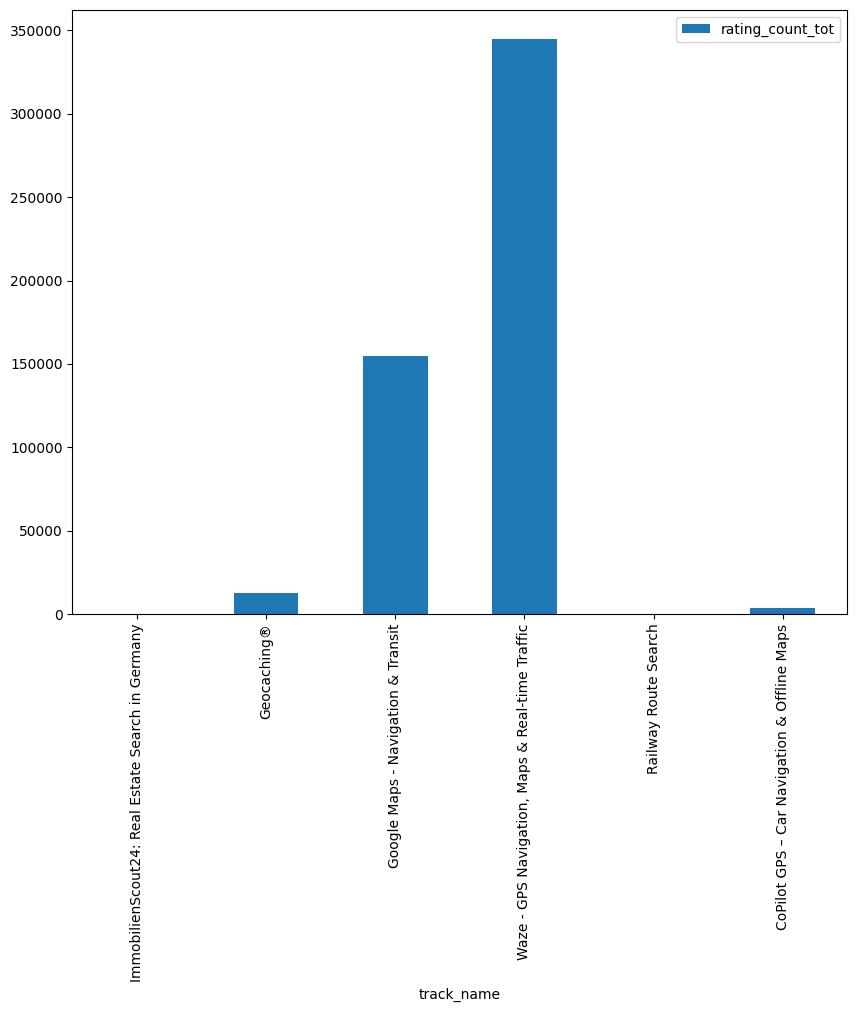

In [74]:
apple_group.get_group("Navigation").plot.bar(x = "track_name", y = "rating_count_tot", figsize=(10, 8))
plt.show()

In [75]:
apple_group.get_group("Reference")

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
715,388389451,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",100551680,USD,0.0,18418,706,4.5,5.0,9.2.1,4+,Reference,37,5,16,1,english
5932,1156856246,Real Bike Traffic Rider Virtual Reality Glasses,125990912,USD,0.0,8,2,3.0,4.5,8.9,17+,Reference,40,5,1,1,english
6,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,english
90,308750436,Dictionary.com Dictionary & Thesaurus,111275008,USD,0.0,200047,177,4.0,4.0,7.1.3,4+,Reference,37,0,1,1,english
2844,640199958,WWDC,34959360,USD,0.0,762,7,3.5,4.5,6.0.0,4+,Reference,37,5,1,1,english
551,414706506,Google Translate,65281024,USD,0.0,26786,27,3.5,4.5,5.10.0,4+,Reference,37,5,59,1,english
913,475772902,Night Sky,596499456,USD,0.0,12122,60,4.5,4.5,4.4.1,4+,Reference,37,5,29,1,english
757,399452287,Merriam-Webster Dictionary,155593728,USD,0.0,16849,1125,4.5,4.5,4.1,4+,Reference,38,1,12,1,english
335,364740856,Dictionary.com Dictionary & Thesaurus for iPad,165748736,USD,0.0,54175,10176,4.5,4.5,4.0,4+,Reference,24,5,9,1,english
7074,671889349,Jishokun-Japanese English Dictionary & Translator,225522688,USD,0.0,0,0,0.0,0.0,2.10.14,12+,Reference,37,4,2,1,english


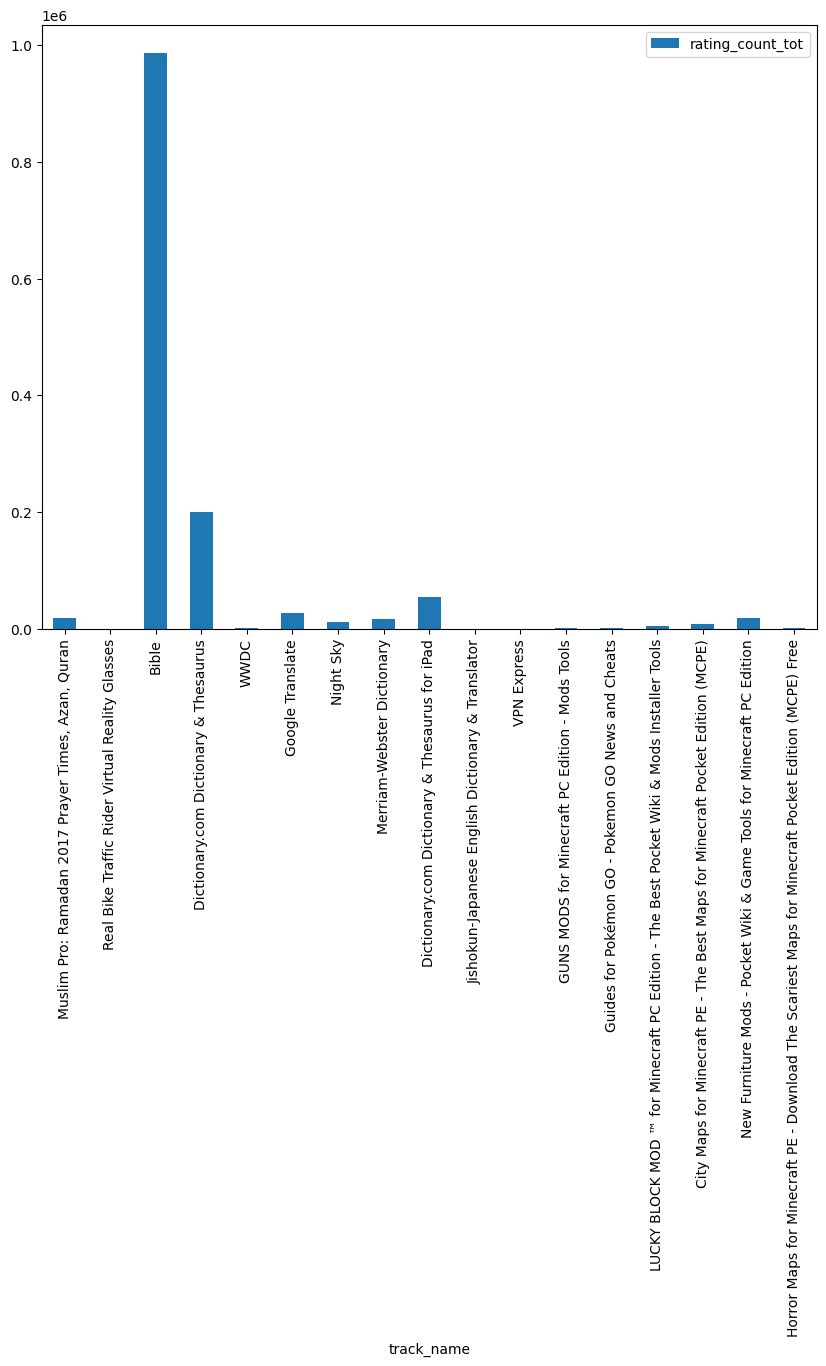

In [76]:
apple_group.get_group("Reference").plot.bar(x = "track_name", y = "rating_count_tot", figsize=(10, 8))
plt.show()

In [77]:
genre = list(apple_group.groups.keys())
apple_group.groups.keys()

dict_keys(['Book', 'Business', 'Catalogs', 'Education', 'Entertainment', 'Finance', 'Food & Drink', 'Games', 'Health & Fitness', 'Lifestyle', 'Medical', 'Music', 'Navigation', 'News', 'Photo & Video', 'Productivity', 'Reference', 'Shopping', 'Social Networking', 'Sports', 'Travel', 'Utilities', 'Weather'])

In [78]:
apple_group.get_group(genre[22])

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
22,295646461,"The Weather Channel: Forecast, Radar & Alerts",199734272,USD,0.0,495626,5893,3.5,4.5,8.11,4+,Weather,37,0,33,1,english
1918,434209233,Moji Weather - Free Weather Forecast,86968320,USD,0.0,2333,0,4.5,0.0,7.0.0,4+,Weather,38,0,3,1,english
5488,526819635,JaxReady,8352768,USD,0.0,22,4,3.5,1.5,6.0.1,17+,Weather,37,5,1,1,english
355,486154808,Weather Underground: Custom Forecast & Local R...,99829760,USD,0.0,49192,1649,4.5,4.5,5.9.4,4+,Weather,37,5,31,1,english
5453,376197239,Météo-France,124090368,USD,0.0,24,2,3.5,5.0,5.7.1150,4+,Weather,37,4,3,1,english
443,749083919,Weather Live Free - Weather Forecast & Alerts,101524480,USD,0.0,35702,3768,4.5,4.5,5.3,4+,Weather,38,5,16,1,english
133,322439990,MyRadar NOAA Weather Radar Forecast,127284224,USD,0.0,150158,3392,4.5,5.0,5.1.4,4+,Weather,37,2,8,1,english
95,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,english
89,364252504,The Weather Channel App for iPad – best local ...,59101184,USD,0.0,208648,25664,4.0,4.5,4.5.1,4+,Weather,24,4,1,1,english
5251,545993260,Weather & Radar,94449664,USD,0.0,37,2,4.0,3.5,4.3.2,4+,Weather,37,3,21,1,english


In [80]:
# # apple_group.get_group("Reference").plot.bar(x = "track_name", y = "rating_count_tot", figsize=(10, 8))
# fig, ax = plt.subplots(6, 4)
# nrows = 6
# ncols = 4
# genre = list(apple_group.groups.keys())
# len_genre = len(genre)
# n = 0


# apple_group.get_group(genre[22])
# while (n < len_genre):
#     for row in range(nrows):
#         for col in range(ncols):
#             category = apple_group.get_group(genre[n])
#             x = category["track_name"]
#             y = category["rating_count_tot"]
#             ax[row,col].plot(x, y)
#             n += 1

In [81]:
# fig, axs = plt.subplots(6,4)

# genre = list(apple_group.groups.keys())
# len_genre = len(genre)
# n = 0


# apple_group.get_group(genre[22])

# for ax in axs.ravel():
#     if n < len_genre:
#         category = apple_group.get_group(genre[n])[["track_name", "rating_count_tot"]].set_index("track_name")
#         catefory.plot.bar(ax=ax)
#     else:
#         break
#     n += 1


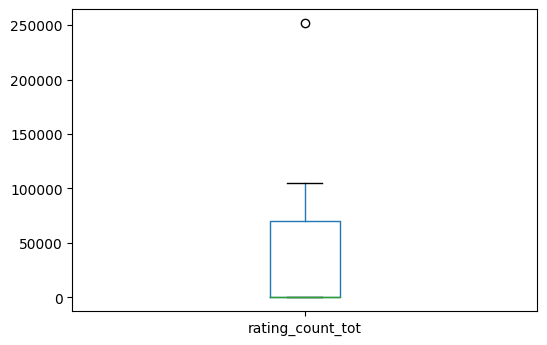

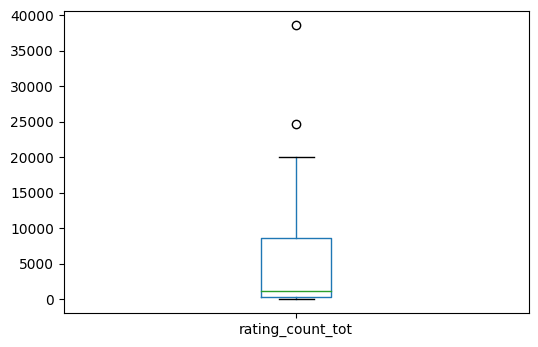

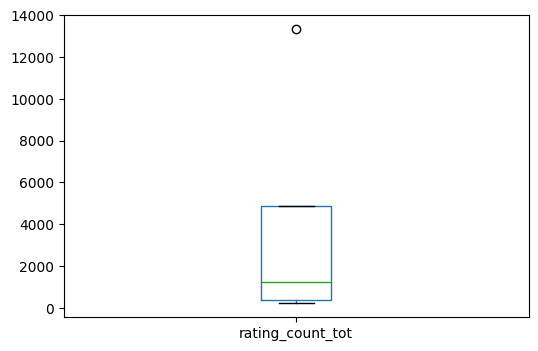

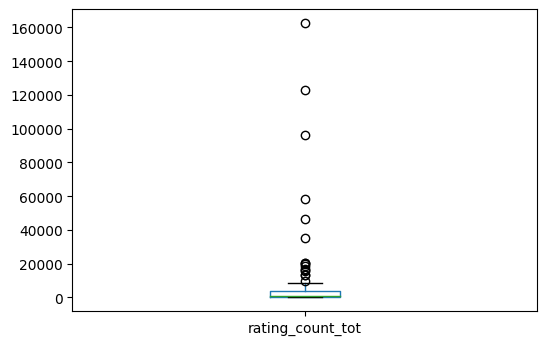

In [82]:
for num in range(4):
    category = apple_group.get_group(genre[num])[["track_name", "rating_count_tot"]].set_index("track_name")
    category.plot.box()


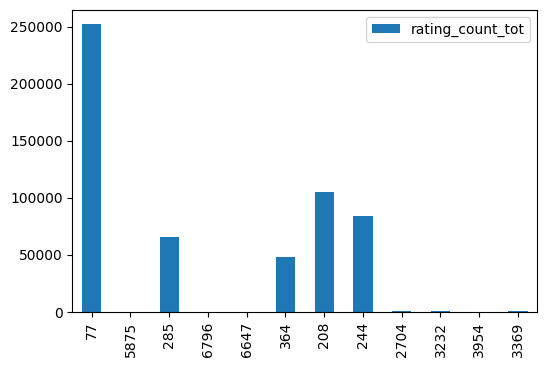

In [83]:
 apple_group.get_group(genre[0])[["track_name", "rating_count_tot"]].plot.bar()

In [84]:
genre[5]

'Finance'

In [85]:
finance = apple_group.get_group('Finance')[["track_name", "rating_count_tot"]]
finance

,track_name,rating_count_tot
357,Citi Mobile®,48822
687,USAA Mobile,19946
1177,Bank of America - Mobile Banking for iPad,7569
174,Bank of America - Mobile Banking,119773
739,TaxCaster – Free tax refund calculator,17516
653,Venmo,21090
175,PayPal - Send and request money safely,119487
5128,Zaim,44
82,"Mint: Personal Finance, Budget, Bills & Money",232940
5927,La Banque Postale,8


In [86]:
book = apple_group.get_group('Book')[["track_name", "rating_count_tot"]]
book = book.set_index('track_name')

In [97]:
business = apple_group.get_group('Business')[["track_name", "rating_count_tot"]]
business = business.set_index('track_name')

In [99]:
business

,rating_count_tot
track_name,
Pulse Secure,53
OPEN Forum,200
AirWatch Agent,1150
GreenVPN - Free & fast VPN with unlimited traffic,464
Indeed Job Search,38681
Mon Espace - Pôle emploi,11
iPlum Business Phone Number for Calling & Texting,392
Cisco AnyConnect,825
SayHi Translate,8623


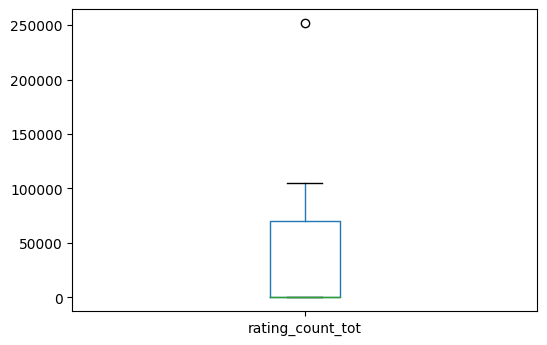

In [87]:
book.plot.box()

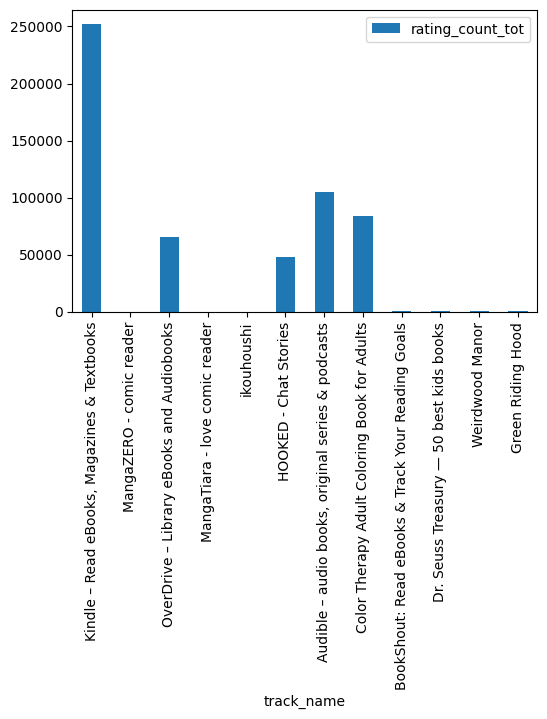

In [88]:
book.plot.bar()

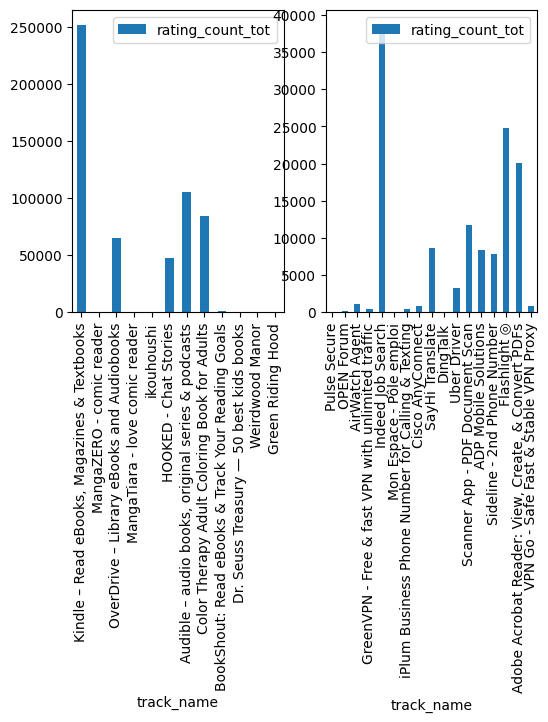

In [127]:
fig, axs = plt.subplots(1,2)
num = 0
for group, ax in zip(genre, axs.ravel()):
    if num < 2:
        category = apple_group.get_group(genre[num])[["track_name", "rating_count_tot"]]
        category = category.set_index("track_name")
        category.plot.bar(ax=ax)
    num +=1
plt.show()

In [129]:
plt.subplots_adjust?

In [130]:
import warnings
warnings.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 57376 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 65293 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 65281 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 33457 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 26413 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 26426 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/b

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 22825 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 29483 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 20140 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 19996 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 35910 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 29923 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/b

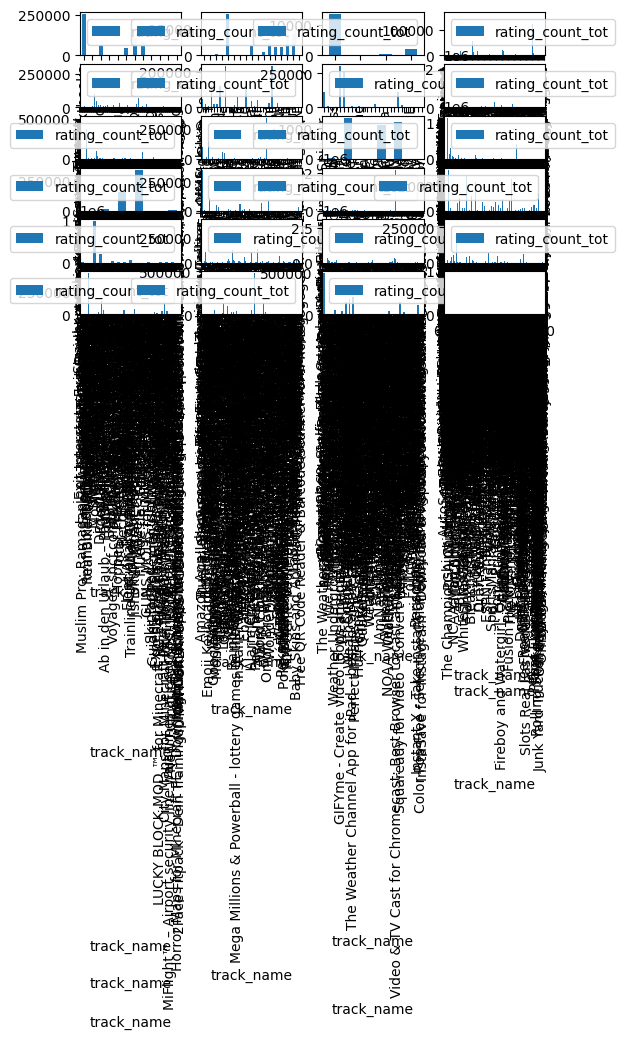

In [128]:
fig, axs = plt.subplots(6,4, figsize=(30, 24))
plt.subplots_adjust(hspace = 0.5)
num = 0
for group, ax in zip(genre, axs.ravel()):
    if num < 24:
        category = apple_group.get_group(genre[num])[["track_name", "rating_count_tot"]]
        category = category.set_index("track_name")
        category.plot.bar(ax=ax)
    num +=1
plt.show()

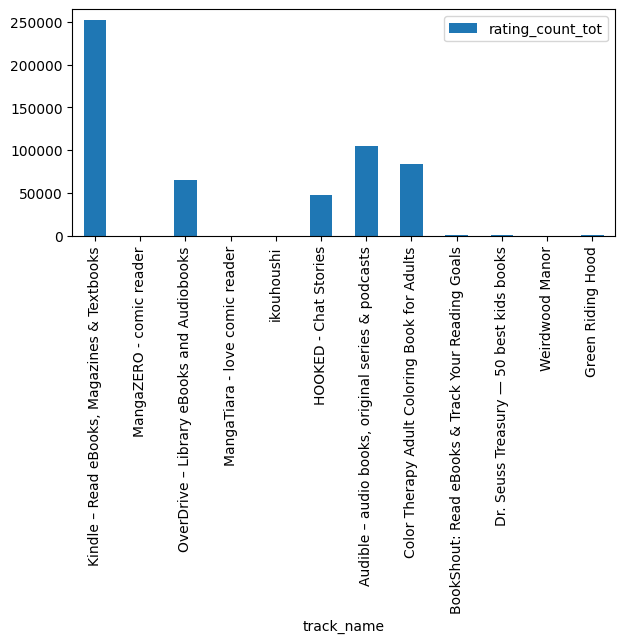

In [236]:
apple_group.get_group(genre[0])[["track_name", "rating_count_tot"]].plot.bar(x = "track_name", y = "rating_count_tot", figsize=(7,3))

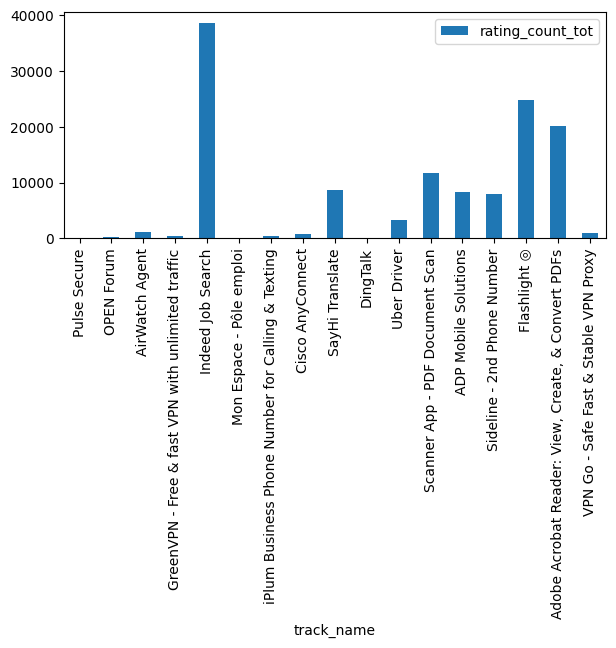

In [237]:
apple_group.get_group(genre[1])[["track_name", "rating_count_tot"]].plot.bar(x = "track_name", y = "rating_count_tot", figsize=(7,3))

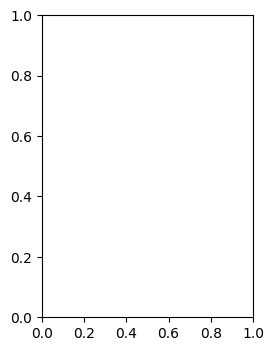

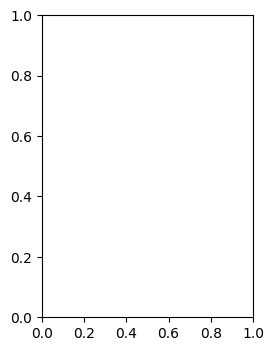

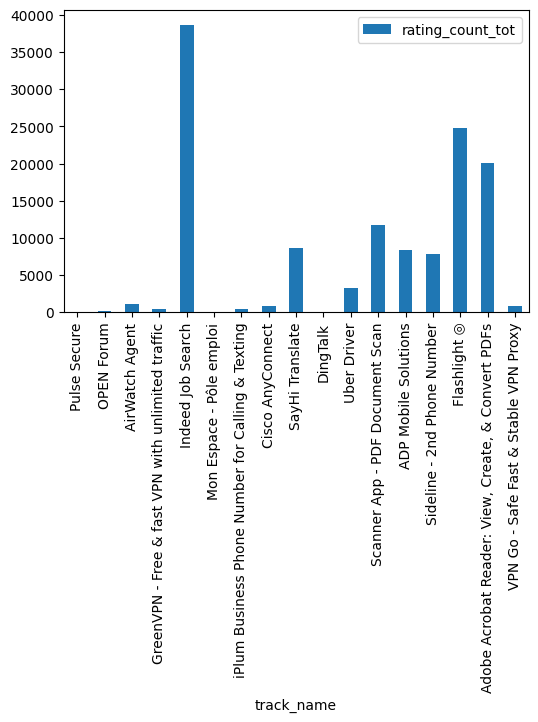

In [239]:
# plt.figure(figsize=(9,3))

plt.subplot(1, 2, 1)
apple_group.get_group(genre[0])[["track_name", "rating_count_tot"]].plot.bar(x = "track_name", y = "rating_count_tot")

plt.subplot(1, 2, 2)
apple_group.get_group(genre[1])[["track_name", "rating_count_tot"]].plot.bar(x = "track_name", y = "rating_count_tot")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

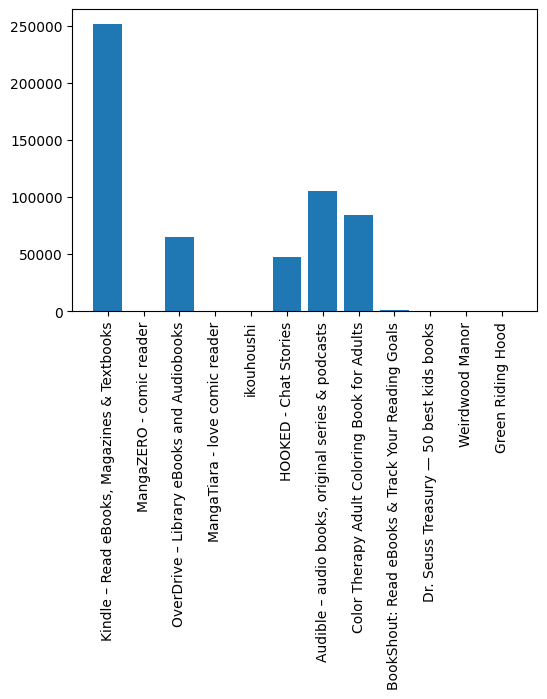

In [260]:
# plt.figure(figsize=(9,3))

# plt.subplot(121)
plt.bar(list(apple_group.get_group(genre[0])["track_name"]), list(apple_group.get_group(genre[0])["rating_count_tot"]))
plt.xticks(rotation = 90)

In [153]:
plt.bar?

## Most Popular Apps by Genre on Google Play

In [77]:
google_clean_2.sort_values(by="Installs", ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
1885,Pou,GAME,4.3,10486018,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up,english
3450,Microsoft Word,PRODUCTIVITY,4.5,2084126,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"July 11, 2018",16.0.10325.20043,4.4 and up,english
465,imo free video calls and chat,COMMUNICATION,4.3,4785988,11M,"500,000,000+",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up,english
1920,Temple Run 2,GAME,4.3,8119154,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up,english
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70M,"500,000,000+",Free,0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up,english


In [78]:
# Firstly, converting the "Installs" column to a float
google_clean_2["Installs"] = google_clean_2["Installs"].str.replace("+", "")
google_clean_2["Installs"] = google_clean_2["Installs"].str.replace(",", "")
google_clean_2["Installs"] = google_clean_2["Installs"].astype(float)
google_clean_2["Category"] = google_clean_2["Category"].str.lower()
google_clean_2["Genres"] = google_clean_2["Genres"].str.lower()

In [79]:
google_clean_2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
2989,GollerCepte Live Score,sports,4.2,9992,31M,1000000.0,Free,0,Everyone,sports,"May 23, 2018",6.5,4.1 and up,english
4970,Ad Block REMOVER - NEED ROOT,tools,3.3,999,91k,100000.0,Free,0,Everyone,tools,"December 17, 2013",3.2,2.2 and up,english
2723,SnipSnap Coupon App,shopping,4.2,9975,18M,1000000.0,Free,0,Everyone,shopping,"January 22, 2018",1.4,4.3 and up,english
3079,US Open Tennis Championships 2018,sports,4.0,9971,33M,1000000.0,Free,0,Everyone,sports,"June 5, 2018",7.1,5.0 and up,english
3229,DreamTrips,travel_and_local,4.7,9971,22M,500000.0,Free,0,Teen,travel & local,"August 6, 2018",1.28.1,5.0 and up,english


In [80]:
google_group = google_clean_2[google_clean_2["Category"] == google_clean_2["Genres"]]

In [81]:
google_clean_2.shape

(8846, 14)

In [82]:
google_group.shape

(4677, 14)

In [83]:
google_group.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
2989,GollerCepte Live Score,sports,4.2,9992,31M,1000000.0,Free,0,Everyone,sports,"May 23, 2018",6.5,4.1 and up,english
4970,Ad Block REMOVER - NEED ROOT,tools,3.3,999,91k,100000.0,Free,0,Everyone,tools,"December 17, 2013",3.2,2.2 and up,english
2723,SnipSnap Coupon App,shopping,4.2,9975,18M,1000000.0,Free,0,Everyone,shopping,"January 22, 2018",1.4,4.3 and up,english
3079,US Open Tennis Championships 2018,sports,4.0,9971,33M,1000000.0,Free,0,Everyone,sports,"June 5, 2018",7.1,5.0 and up,english
7982,"Easy Resume Builder, Resume help, Curriculum v...",tools,4.3,996,10M,50000.0,Free,0,Everyone,tools,"September 28, 2017",2.3,4.0.3 and up,english


In [84]:
google_category = google_group.groupby("Category")

In [85]:
google_category.groups.keys()

dict_keys(['beauty', 'business', 'comics', 'communication', 'dating', 'education', 'entertainment', 'events', 'finance', 'lifestyle', 'medical', 'parenting', 'personalization', 'photography', 'productivity', 'shopping', 'social', 'sports', 'tools', 'weather'])

In [86]:
category_app = {}

for category in google_category.groups.keys():
    total = google_category.get_group(category)["Installs"].sum()
    len_category = google_category.get_group(category)["Installs"].count()
    category_app[category] = round(total/len_category, 2)
category_app

{'beauty': 513151.89,
 'business': 1712290.15,
 'comics': 847380.19,
 'communication': 38590581.09,
 'dating': 854028.83,
 'education': 1663978.49,
 'entertainment': 12415949.37,
 'events': 253542.22,
 'finance': 1387692.48,
 'lifestyle': 1421219.91,
 'medical': 120616.49,
 'parenting': 467977.5,
 'personalization': 5201482.61,
 'photography': 17805627.64,
 'productivity': 16787331.34,
 'shopping': 7036877.31,
 'social': 23253652.13,
 'sports': 3650602.28,
 'tools': 10711834.42,
 'weather': 5145550.29}

In [87]:
category_app = dict(sorted(category_app.items(), key=lambda x: x[1], reverse=True))

In [88]:
category_app

{'communication': 38590581.09,
 'social': 23253652.13,
 'photography': 17805627.64,
 'productivity': 16787331.34,
 'entertainment': 12415949.37,
 'tools': 10711834.42,
 'shopping': 7036877.31,
 'personalization': 5201482.61,
 'weather': 5145550.29,
 'sports': 3650602.28,
 'business': 1712290.15,
 'education': 1663978.49,
 'lifestyle': 1421219.91,
 'finance': 1387692.48,
 'dating': 854028.83,
 'comics': 847380.19,
 'beauty': 513151.89,
 'parenting': 467977.5,
 'events': 253542.22,
 'medical': 120616.49}

In [89]:
apple_popular

{'Navigation': 86090.33,
 'Reference': 79350.47,
 'Social Networking': 71548.35,
 'Music': 57326.53,
 'Weather': 52279.89,
 'Book': 46384.92,
 'Food & Drink': 33333.92,
 'Finance': 32367.03,
 'Photo & Video': 28441.54,
 'Travel': 28243.8,
 'Shopping': 27230.73,
 'Health & Fitness': 23298.02,
 'Sports': 23008.9,
 'Games': 22910.83,
 'News': 21248.02,
 'Productivity': 21028.41,
 'Utilities': 19156.49,
 'Lifestyle': 16815.48,
 'Entertainment': 14195.36,
 'Business': 7491.12,
 'Education': 7003.98,
 'Catalogs': 4004.0,
 'Medical': 612.0}